<a href="https://colab.research.google.com/github/metoranoia/logistic-regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

In [37]:
# Create a Pandas dataframe
df = pd.read_csv('/content/stroke_data.csv')

# Handle Missing Value
df = df.dropna(axis=0)

# Split the dataframe into predictor variables (X) and target variable (y)
X = df.drop(['stroke','age'], axis=1)
y = df['stroke']


In [56]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)

In [57]:
# Fit a logistic regression model using all predictor variables
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [58]:
# Use GLM method for logreg here so that we can retrieve the influence measures
logit_model = GLM(y_train, x_train, family=families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 stroke   No. Observations:                34770
Model:                            GLM   Df Residuals:                    34761
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21082.
Date:                Mon, 24 Apr 2023   Deviance:                       42164.
Time:                        07:11:07   Pearson chi2:                 3.55e+04
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1594
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
sex                  -0.4811      0.02

In [59]:
y_pred = model.predict(x_test)

In [60]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2377,  718],
       [1153, 1889]])

Text(0.5, 427.9555555555555, 'Predicted label')

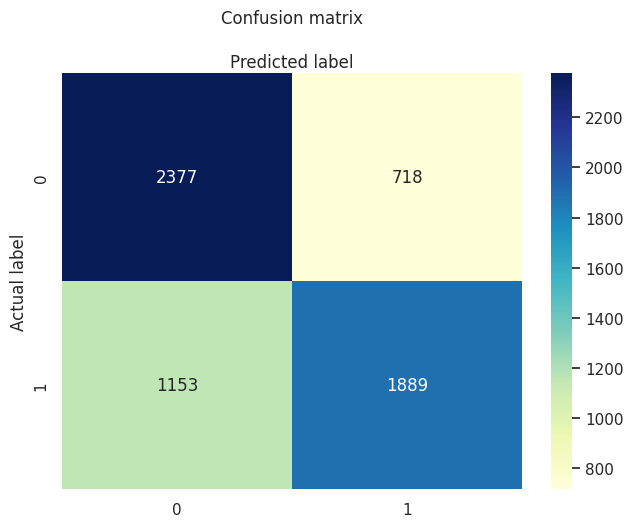

In [61]:
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [62]:
from sklearn.metrics import classification_report
target_names = ['without stroke', 'with stroke']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

without stroke       0.67      0.77      0.72      3095
   with stroke       0.72      0.62      0.67      3042

      accuracy                           0.70      6137
     macro avg       0.70      0.69      0.69      6137
  weighted avg       0.70      0.70      0.69      6137



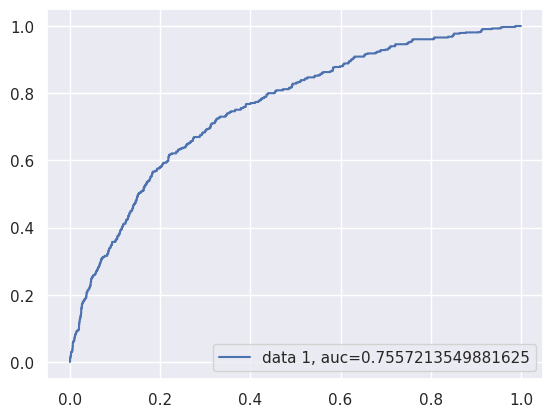

In [63]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()